# Lab 3: Logistic Regression, Support Vector Machines, and Evaluation


In this lab we'll get some hands on experience with two more classifiers we've seen in class
- Logitic Regression
- Support Vector Machines

We will also explore evaluation metrics that we covered in class and understand how to calculate them.

## Goals for this lab

- Understand the practical implications for changing the parameters used in Logistic Regression and Support Vector Machines
  
- Learn more about the evaluation metrics covered in class and learn how to calculate them (at different thresholds)
  - accuracy
  - precision
  - recall
  - AUC

In [166]:
### import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.tree as tree
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as accuracy
import graphviz # If you don't have this, install via pip/conda
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
%matplotlib inline

# exercise: what additional modules should you import?

# Data
We'll continue to use the same data as in the previous lab.

It is a subset of the data set from https://www.kaggle.com/new-york-state/nys-patient-characteristics-survey-pcs-2015

The data has been downloaded, modified, and is in the github repo for the lab

You should also try this with other data sets you have been provided for the homeworks.

In [8]:
# Change this to wherever you're storing your data
datafile = '../data/nysmedicaldata.csv'
df = pd.read_csv(datafile)

In [9]:
df.head()

,Region Served,Age Group,Sex,Transgender,Sexual Orientation,Hispanic Ethnicity,Race,Living Situation,Household Composition,Preferred Language,...,No Insurance,Unknown Insurance Coverage,Medicaid Insurance,Medicaid Managed Insurance,Medicare Insurance,Private Insurance,Child Health Plus Insurance,Other Insurance,Criminal Justice Status,Three Digit Residence Zip Code
0,HUDSON RIVER REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,YES,OTHER,OTHER LIVING SITUATION,NOT APPLICABLE,ENGLISH,...,NO,NO,YES,NO,NO,NO,NO,NO,YES,113
1,NEW YORK CITY REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,INSTITUTIONAL SETTING,NOT APPLICABLE,ENGLISH,...,NO,NO,YES,NO,UNKNOWN,NO,NO,UNKNOWN,YES,113
2,HUDSON RIVER REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,ENGLISH,...,NO,NO,YES,NO,NO,NO,NO,NO,YES,107
3,NEW YORK CITY REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",OTHER,OTHER LIVING SITUATION,NOT APPLICABLE,ASIAN AND PACIFIC ISLAND,...,YES,NO,NO,NOT APPLICABLE,NO,NO,NO,NO,YES,888
4,LONG ISLAND REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",BLACK ONLY,OTHER LIVING SITUATION,NOT APPLICABLE,ENGLISH,...,NO,NO,YES,UNKNOWN,YES,NO,NO,NO,NO,117


In [ ]:
df.dtypes

# Some Quick Data Exploration
Before running any sort of model on your dataset, it's always a good idea to do some quick data exploration to get a sense of how your data looks like. Try to answer the following questions with some sort of plot/histogram/etc:

1) What do the distributions of each feature look like?

In [ ]:
# Ex


# Using scikitlearn for classification

sklearn is a very useful python packager for building machiune learning models. To build a model in sklearn, you need to have a matrix (or dataframe) with X and y columns. X is your set of features/predictors. y is a single column that is your label. We'll take the foll;owing steps:

1. Select/create column as label/outcome (y)
2. Select/create columns as features (X)
3. Create Training Set
4. Create Validation Set
5. Build model on Training Set
6. Predict risk scores for the Validation Set
7. Calculate performance metric(s)

## Some useful things to know in sklearn

fit = train an algorithm

predict_proba = predict a "risk" score for all possible classes for a given record (classification only)


## Important- never use .predict
There is also a function called "predict" which first runs predict_probs and then predicts a 1 if the score > 0.5 and 0 otherwise. *Never* use that function since 0.5 is a completely arbitrary threshold to call a prediction 1 vs 0.



## 1. Create label/outcome
One thing we can do with this dataset is to try to use the various feature columns to classify whether a person has High Blood Pressure. Let's create a column that is 1 if a person has High Blood Pressure and 0 otherwise

In [10]:
# code
df['HBP'] = np.where(df['High Blood Pressure']=="YES", 1, 0)

### Question: what percentage of people have High Blood Pressure?

In [11]:
# code
df['HBP'].mean()

0.21600738092492217

## 2. create or select existing predictors/features

For now, let's take a handful of existing columns to use.

sklearn needs features to be numeric and not categorical so we'll have to turn our selected features to be binary (also known as dummy variables)

In [12]:
# code
cols_to_transform = [ 'Sex', 'Race', 'Obesity', 'Smokes', 'Alcohol Related Disorder','Drug Substance Disorder',
                    'Criminal Justice Status','Private Insurance']
df = pd.get_dummies( df, dummy_na=True, columns = cols_to_transform )
df.head()

,Region Served,Age Group,Transgender,Sexual Orientation,Hispanic Ethnicity,Living Situation,Household Composition,Preferred Language,Veteran Status,Employment Status,...,Drug Substance Disorder_YES,Drug Substance Disorder_nan,Criminal Justice Status_NO,Criminal Justice Status_UNKNOWN,Criminal Justice Status_YES,Criminal Justice Status_nan,Private Insurance_NO,Private Insurance_UNKNOWN,Private Insurance_YES,Private Insurance_nan
0,HUDSON RIVER REGION,ADULT,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,YES,OTHER LIVING SITUATION,NOT APPLICABLE,ENGLISH,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,...,1,0,0,0,1,0,1,0,0,0
1,NEW YORK CITY REGION,ADULT,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",INSTITUTIONAL SETTING,NOT APPLICABLE,ENGLISH,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,...,1,0,0,0,1,0,1,0,0,0
2,HUDSON RIVER REGION,ADULT,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",PRIVATE RESIDENCE,COHABITATES WITH OTHERS,ENGLISH,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,...,0,0,0,0,1,0,1,0,0,0
3,NEW YORK CITY REGION,ADULT,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",OTHER LIVING SITUATION,NOT APPLICABLE,ASIAN AND PACIFIC ISLAND,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,...,0,0,0,0,1,0,1,0,0,0
4,LONG ISLAND REGION,ADULT,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",OTHER LIVING SITUATION,NOT APPLICABLE,ENGLISH,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,...,0,0,1,0,0,0,1,0,0,0


Now let's define a vector of column names with only those dummy variables.

In [13]:
# code
selected_features = ['Sex_FEMALE','Sex_MALE','Sex_UNKNOWN','Race_BLACK ONLY','Race_MULTI-RACIAL','Race_OTHER',
                     'Race_UNKNOWN RACE','Race_WHITE ONLY', 'Obesity_YES', 'Obesity_NO', 'Obesity_nan', 
                     'Smokes_YES', 'Smokes_NO','Alcohol Related Disorder_NO','Alcohol Related Disorder_YES',
                    'Alcohol Related Disorder_UNKNOWN','Criminal Justice Status_YES','Criminal Justice Status_NO',
                    'Criminal Justice Status_UNKNOWN','Private Insurance_NO','Private Insurance_YES','Private Insurance_UNKNOWN']

# Train/Test Splits

Create a train/test set split using sklearn's [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function. We'll use these train/test splits for evaluating all our classification models.

In [14]:
# code
x = df[selected_features]
y = df['HBP']
test_size = 0.3 # you can adjust this
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size)

# Logistic Regression
See the sklearn documentation on Logistic Regression to see its parameters. The one's we'll mostly be interested in are:
- penalty
- C

Remember that when training a model, **you should only use the training data!** The test set is reserved exclusively for evaluating your model. Now let's use the classifier:

In [36]:
# code
lr = LogisticRegression(random_state=0, solver='liblinear')
lr.fit(x_train, y_train)
pred_scores = lr.predict_proba(x_test)

In [37]:
print(pred_scores)

[[0.75929133 0.24070867]
 [0.64513388 0.35486612]
 [0.75818005 0.24181995]
 ...
 [0.64228939 0.35771061]
 [0.82387763 0.17612237]
 [0.75929133 0.24070867]]


## Logistic Regression Tasks:

The goal here is to explore different penalty parameters and different C values. You can also try modofyinfg other parameters to see their impact. How does accuracy change, using different thresholds, as you vary penalty and C values? You can write a nested for loop that loops over all the parameters and values and store the results in a data frame (similar to last lab)

Ref: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

You'll notice that LogisticRegression takes a ton of parameters. We'll play around with the "penalty" and "C" parameters.
If we set the penalty parameter to ['l2'](http://mathworld.wolfram.com/L2-Norm.html), sklearn's LogisticRegression model solves the following minimization problem:

$$ \min_{\beta} ||\beta||_2 + C \sum_{i} \log ( -y_i (X_i^T \beta) +1)$$

Similarly, if we set the penalty parameter to ['l1'](http://mathworld.wolfram.com/L2-Norm.html), LogisticRegression will solve the following minimization problem:

$$\min_{\beta} ||\beta||_1 + C \sum_{i} \log ( -y_i (X_i^T \beta) +1)$$

where $$||\beta||_2 = \sqrt { \sum_{i} \beta_i^2 }$$ and $$||\beta||_1 =  \sum_{i} | \beta_i | $$ 

Try running logistic regression with both L1 and L2 penalties and a mix of C values. Something like $10^{-2}, 10^{-1}, 1, 10, 10^2)$ is reasonable.

In [65]:
# we first choose a threshold to determine the pridiction 
print("The true number of HBP is {}/{} from the data, with percentage {:.2f}%\n".format(
    sum(y_test), len(y_test), 100.*sum(y_test)/len(y_test)))
for threshold in [0.1, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5, 0.6, 0.7]:
    pred_label = [1 if x[1]>threshold else 0 for x in pred_scores]
    print("(Threshold: {}), the total number of predicted HBP is {}, the accuracy is {:.2f}".format(
        threshold, sum(pred_label), accuracy(pred_label,y_test)))

The true number of HBP is 541/2602 from the data, with percentage 20.79%

(Threshold: 0.1), the total number of predicted HBP is 2539, the accuracy is 0.23
(Threshold: 0.2), the total number of predicted HBP is 1604, the accuracy is 0.48
(Threshold: 0.25), the total number of predicted HBP is 578, the accuracy is 0.70
(Threshold: 0.3), the total number of predicted HBP is 377, the accuracy is 0.74
(Threshold: 0.35), the total number of predicted HBP is 291, the accuracy is 0.76
(Threshold: 0.4), the total number of predicted HBP is 113, the accuracy is 0.78
(Threshold: 0.5), the total number of predicted HBP is 0, the accuracy is 0.79
(Threshold: 0.6), the total number of predicted HBP is 0, the accuracy is 0.79
(Threshold: 0.7), the total number of predicted HBP is 0, the accuracy is 0.79


It seems like 0.3 is a reasonable value. Then we fix the threshold and adjust penalty and the C value

In [96]:
# code
threshold = 0.3
penalties = ['l1', 'l2']
c_values = [10**-2, 10**-1, 1 , 10, 10**2]
for norm in penalties:
    for reg_strength in c_values:
        lrf = LogisticRegression(random_state=0, solver='liblinear', penalty=norm, C=reg_strength).fit(x_train, y_train)
        pred_scores = lrf.predict_proba(x_test)
        pred_label = [1 if x[1]>threshold else 0 for x in pred_scores]
        print("(reg: {}, C: {}), the total number of predicted HBP is {}, the accuracy is {:.2f}".format(
            norm, reg_strength, sum(pred_label), accuracy(pred_label,y_test)))
    print

(reg: l1, C: 0.01), the total number of predicted HBP is 504, the accuracy is 0.72
(reg: l1, C: 0.1), the total number of predicted HBP is 394, the accuracy is 0.74
(reg: l1, C: 1), the total number of predicted HBP is 376, the accuracy is 0.75
(reg: l1, C: 10), the total number of predicted HBP is 372, the accuracy is 0.75
(reg: l1, C: 100), the total number of predicted HBP is 377, the accuracy is 0.74

(reg: l2, C: 0.01), the total number of predicted HBP is 397, the accuracy is 0.74
(reg: l2, C: 0.1), the total number of predicted HBP is 378, the accuracy is 0.75
(reg: l2, C: 1), the total number of predicted HBP is 372, the accuracy is 0.75
(reg: l2, C: 10), the total number of predicted HBP is 377, the accuracy is 0.74
(reg: l2, C: 100), the total number of predicted HBP is 377, the accuracy is 0.74



## Understanding what's going on inside Logistic Regression

To really see the difference between L1 and L2 regularization, we need to take a closer look at the models they produced. Plot a histogram of the weight values of LogisticRegression models for each C value. You can access these weight coefficients via the coef\_ attribute in LogisticRegression. Do you notice anything interesting happening as the C value varies?

In [97]:
# code
coefs = []

for norm in penalties:
    coef = []
    for reg_strength in c_values:
        lrf = LogisticRegression(random_state=0, solver='liblinear', penalty=norm, C=c_value).fit(x_train, y_train)
        pred_scores = lrf.predict_proba(x_test)
        pred_label = [1 if x[1]>threshold else 0 for x in pred_scores]
        coef.append(lrf.coef_)
    coefs.append(coef)

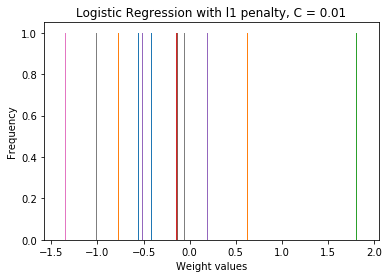

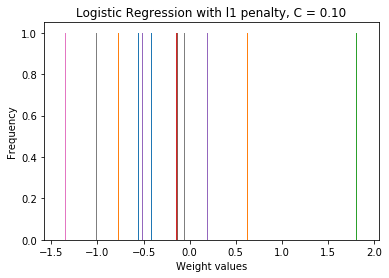

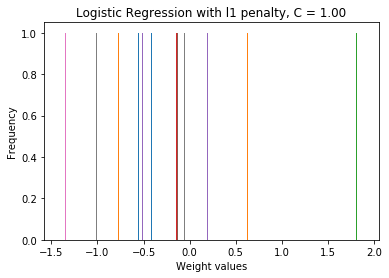

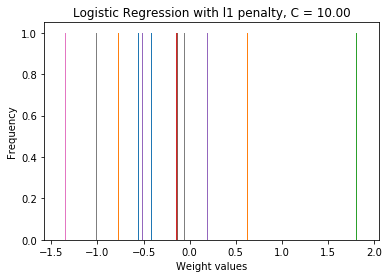

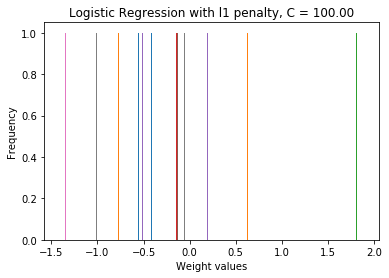

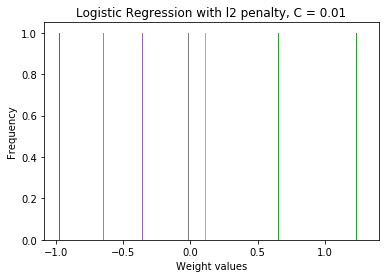

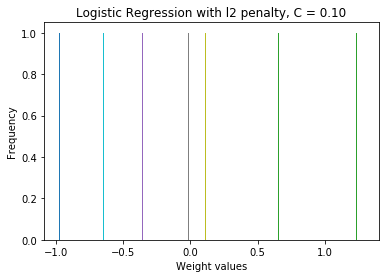

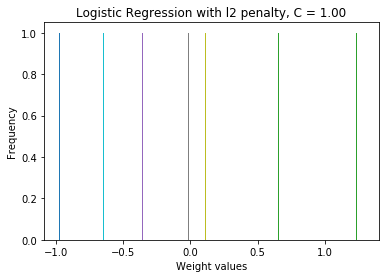

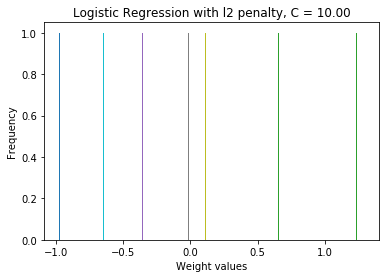

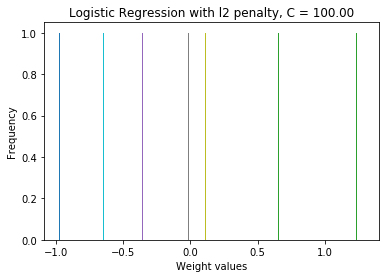

In [105]:
num_C = 5
num_penalty = 2
index = 1
for p_i in range(num_penalty):
    for c_i in range(num_C):
        plt.hist(coefs[p_i][c_i], bins=30)
        plt.title('Logistic Regression with %s penalty, C = %.2f' %(penalties[p_i], c_values[c_i]))
        plt.xlabel('Weight values')
        plt.ylabel('Frequency')
        index += 1
        plt.show()

you can think of the "C" parameter as a way of specifying the tradeoff between the L1/L2 penalty and the negative log likelihood of the model. 

A small value of "C" means that we are assigning greater weight to the L1/L2 penalty(equivalently downweighting the negative log likelihood).

L1 regularization induces sparse models - this can be a very useful if you suspect your classification target variable can be explained by few features.

* Sparsity refers to that only very few entries in a matrix (or vector) is non-zero. L1-norm has the property of producing many coefficients with zero values or very small values with few large coefficients.

# Support Vector Machines

Ref: https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC
The SVM Classifier also takes quite a few parameters. For now we will use Linear SVMs. The model is called LinearSVC in sklearn.

We will be playing with following parameters:
* C: same as above

SVM tries to find the hyperplane that maximizes the "margin" between the two classes of points. The "C" parameter in [SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) has the same role as the "C" parameter in LogisticRegression: it tells you how much to penalize the "size" of the weight vector. Note that SVC only allows for L2 regularization.



### Let's fit an SVM

In [117]:
svm = LinearSVC(random_state=0, tol=1e-5)
svm.fit(x_train, y_train)
confidence_score = svm.decision_function(x_test)
print(confidence_score[:10])
print("the average of the confidence score is: %.2f" % confidence_score.mean())

[-0.51611687 -0.29820437 -0.51272115 -0.51611687 -0.35975434 -0.58490291
 -0.74248609 -0.58490291 -0.51611687 -0.57761275]
the average of the confidence score is: -0.56


### Now predict scores on the test set and plot the distribution of scores
You might notice that the function you've been using to predict so far does not work. Is another function you need to use? Which one? Why?

The confidence score for a sample is the signed distance of that sample to the hyperplane.

return:
array, shape=(n_samples,) if n_classes == 2 else (n_samples, n_classes)

Confidence scores per (sample, class) combination. In the binary case, confidence score for self.classes_[1] where >0 means this class would be predicted.

### now we can select a threshold and calculate accuracy

In [123]:
# code
print("The true number of HBP is {}/{} from the data, with percentage {:.2f}%\n".format(
    sum(y_test), len(y_test), 100.*sum(y_test)/len(y_test)))
for threshold in [-1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0] : # , -0.6, ]:
    pred_label = [1 if x >threshold else 0 for x in confidence_score]
    print("(Threshold: {}), the total number of predicted HBP is {}, the accuracy is {:.2f}".format(
        threshold, sum(pred_label), accuracy(pred_label,y_test)))

The true number of HBP is 541/2602 from the data, with percentage 20.79%

(Threshold: -1), the total number of predicted HBP is 2598, the accuracy is 0.21
(Threshold: -0.9), the total number of predicted HBP is 2581, the accuracy is 0.22
(Threshold: -0.8), the total number of predicted HBP is 2460, the accuracy is 0.25
(Threshold: -0.7), the total number of predicted HBP is 2130, the accuracy is 0.34
(Threshold: -0.6), the total number of predicted HBP is 1638, the accuracy is 0.47
(Threshold: -0.5), the total number of predicted HBP is 631, the accuracy is 0.69
(Threshold: -0.4), the total number of predicted HBP is 393, the accuracy is 0.74
(Threshold: -0.3), the total number of predicted HBP is 291, the accuracy is 0.76
(Threshold: -0.2), the total number of predicted HBP is 26, the accuracy is 0.79
(Threshold: -0.1), the total number of predicted HBP is 0, the accuracy is 0.79
(Threshold: 0), the total number of predicted HBP is 0, the accuracy is 0.79


-0.4 is an ideal threshold.

### Let's now vary values of C and see the results.

In [131]:
# code
threshold = -0.4
c_values = [10**-2, 10**-1, 1 , 10, 10**2]
for c_value in c_values:
    svm = LinearSVC(random_state=0, tol=1e-5, C=c_value).fit(x_train, y_train)
    confidence_score = lrf.decision_function(x_test)
    pred_label = [1 if x > threshold else 0 for x in confidence_score]
    print("(C: {}), the total number of predicted HBP is {}, the accuracy is {:.2f}".format(
        c_value, sum(pred_label), accuracy(pred_label, y_test)))

(C: 0.01), the total number of predicted HBP is 113, the accuracy is 0.78
(C: 0.1), the total number of predicted HBP is 113, the accuracy is 0.78
(C: 1), the total number of predicted HBP is 113, the accuracy is 0.78
(C: 10), the total number of predicted HBP is 113, the accuracy is 0.78
(C: 100), the total number of predicted HBP is 113, the accuracy is 0.78


Varing the value of C doesn't have much effect on accuracy for this dataset under the current setting of the model

# Evaluation Metrics

We covered several evaluation metrics in class:
    - accuracy
    - precision
    - recall
    - area under curve
    - ROC curves
    
Although sklearn has built-in functions to calculate these metrics,
in this lab we want to give you an understanding of these metrics 
by writing functions to calculate them yourself.

Remember that accuracy, precision, and recall are calculated at a specific threshold for turning scores into 0 and 1.


### Set Threshold


In [137]:
threshold = -0.4

### We will first create a confusion matrix based on this threshold

In [138]:
svm = LinearSVC(random_state=0, tol=1e-5).fit(x_train, y_train)
confidence_score = lrf.decision_function(x_test)
pred_label = [1 if x > threshold else 0 for x in confidence_score]
c = confusion_matrix(y_test, pred_label)

I create a confusion matrix for our SVM classifier.

In [141]:
true_negatives, false_positive, false_negatives, true_positives = c.ravel()
(true_negatives, false_positive, false_negatives, true_positives)

(1987, 74, 502, 39)

### Let's now write functions that can calculate each metric

In [164]:
def calculate_accuracy_at_threshold(predicted_scores, true_labels, threshold):
    pred_label = [1 if x > threshold else 0 for x in predicted_scores]
    true_negatives, false_positive, false_negatives, true_positives = confusion_matrix(y_test, pred_label).ravel()
    return 1.0 * (true_positives + true_negatives) / (true_negatives + false_positive + false_negatives + true_positives)

def calculate_precision_at_threshold(predicted_scores, true_labels, threshold):
    pred_label = [1 if x > threshold else 0 for x in predicted_scores]
    _, false_positive, _, true_positives = confusion_matrix(y_test, pred_label).ravel()
    return 1.0 * true_positives / (false_positive + true_positives)

def calculate_recall_at_threshold(predicted_scores, true_labels, threshold):
    pred_label = [1 if x > threshold else 0 for x in predicted_scores]
    _, _, false_negatives, true_positives = confusion_matrix(y_test, pred_label).ravel()
    return 1.0 * true_positives / (false_negatives + true_positives)

Accuracy = TP+TN/TP+FP+FN+TN

Precision = TP/TP+FP

Recall = TP/TP+FN

### Now let's calculate all of these for a logistic regression model you built above

In [165]:
threshold = 0.3
lrf = LogisticRegression(random_state=0, solver='liblinear').fit(x_train, y_train)
predicted_scores = lrf.predict_proba(x_test)
# print(predicted_scores)
# print(predicted_scores[:,1])

print("The accuracy is %.2f" % calculate_accuracy_at_threshold(predicted_scores[:,1], y_test, threshold))
print("The precision is %.2f" % calculate_precision_at_threshold(predicted_scores[:,1], y_test, threshold))
print("The recall is %.2f" % calculate_recall_at_threshold(predicted_scores[:,1], y_test, threshold))

The accuracy is 0.75
The precision is 0.34
The recall is 0.23


### Now let's write a function that generates the precision, recall, k (% of population) graph that we covered in class
<img src="../imgs/prk.png">


In [169]:
def plot_precision_recall_k(predicted_scores, true_labels):
    precision, recall, thresholds = precision_recall_curve(true_labels, predicted_scores)
    plt.plot(recall, precision, marker='.')
    plt.show()

### let's plot it for the same logistic regression model

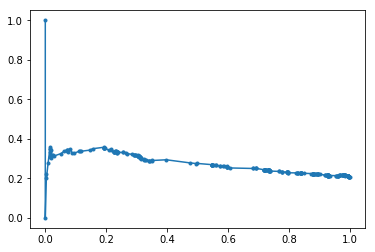

In [170]:
plot_precision_recall_k(predicted_scores[:,1], y_test)

### Now we build the same graph for an svm model and compare the two. Which one is better?

In [ ]:
svm = LinearSVC(random_state=0, tol=1e-5).fit(x_train, y_train)
confidence_score = lrf.decision_function(x_test)
plot_precision_recall_k(predicted_scores[:,1], y_test)